In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Supplement.csv')

In [ ]:
data.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [ ]:
df_tempo = data.groupby('Date')['Revenue'].count().reset_index()


In [ ]:
df_tempo

,Date,Revenue
0,2020-01-06,16
1,2020-01-13,16
2,2020-01-20,16
3,2020-01-27,16
4,2020-02-03,16
...,...,...
269,2025-03-03,16
270,2025-03-10,16
271,2025-03-17,16
272,2025-03-24,16


# Importação da Biblioteca Prophet para perever as séries temporais


In [ ]:
from prophet import Prophet


# Atribuindo a coluna Date para a coluna DS.
# Atribuindo a coluna Price para a coluna y.

In [ ]:
df_prophet = data[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
df_prophet.head()

,ds,y
0,2020-01-06,31.98
1,2020-01-06,42.51
2,2020-01-06,12.91
3,2020-01-06,16.07
4,2020-01-06,35.47


In [ ]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2020-01-06,480.48
1,2020-01-13,490.16
2,2020-01-20,515.22
3,2020-01-27,472.66
4,2020-02-03,658.74
...,...,...
269,2025-03-03,426.46
270,2025-03-10,611.21
271,2025-03-17,446.12
272,2025-03-24,471.51


Convertendo o Data Frame

In [ ]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])


In [ ]:
np.random.seed(42)


In [ ]:
modelo = Prophet()

modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsoes = modelo.predict(futuro)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftre5zqy/mnvb30k4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftre5zqy/cpwf5xrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82756', 'data', 'file=/tmp/tmpftre5zqy/mnvb30k4.json', 'init=/tmp/tmpftre5zqy/cpwf5xrq.json', 'output', 'file=/tmp/tmpftre5zqy/prophet_modelzm5375te/prophet_model-20251009185239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


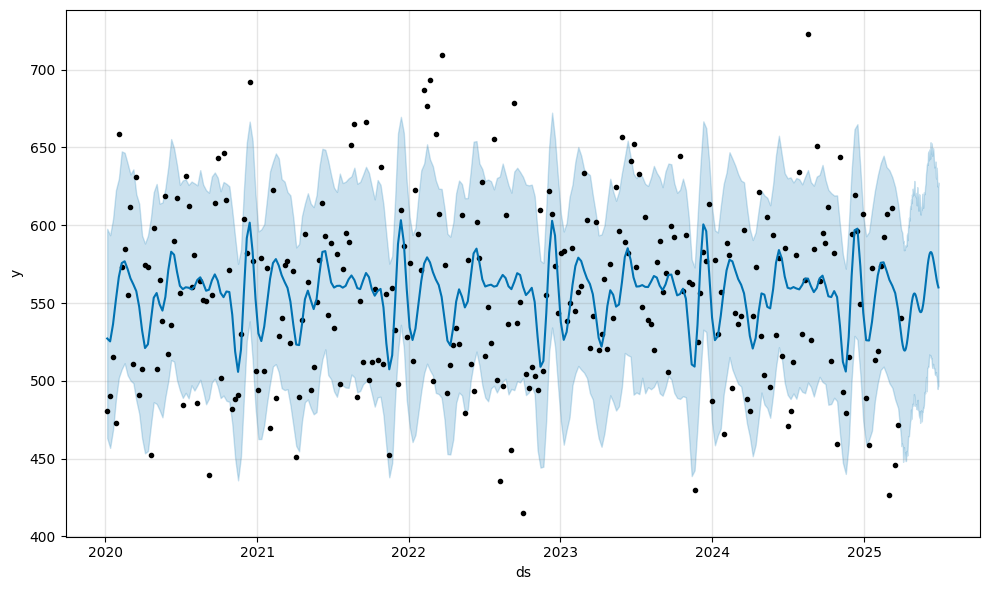

In [ ]:
fig1 = modelo.plot(previsoes)


In [ ]:
previsoes[['ds','yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-06,527.216640,463.169968,597.712999
1,2020-01-13,525.354417,456.911634,593.603156
2,2020-01-20,536.383672,468.427782,603.976113
3,2020-01-27,552.268120,488.027646,622.570844
4,2020-02-03,566.773700,502.019693,629.899871
...,...,...,...,...
359,2025-06-25,564.624260,502.768631,636.990820
360,2025-06-26,563.259483,499.351243,627.882161
361,2025-06-27,562.031911,494.796238,624.774165
362,2025-06-28,560.953825,496.374734,625.478354


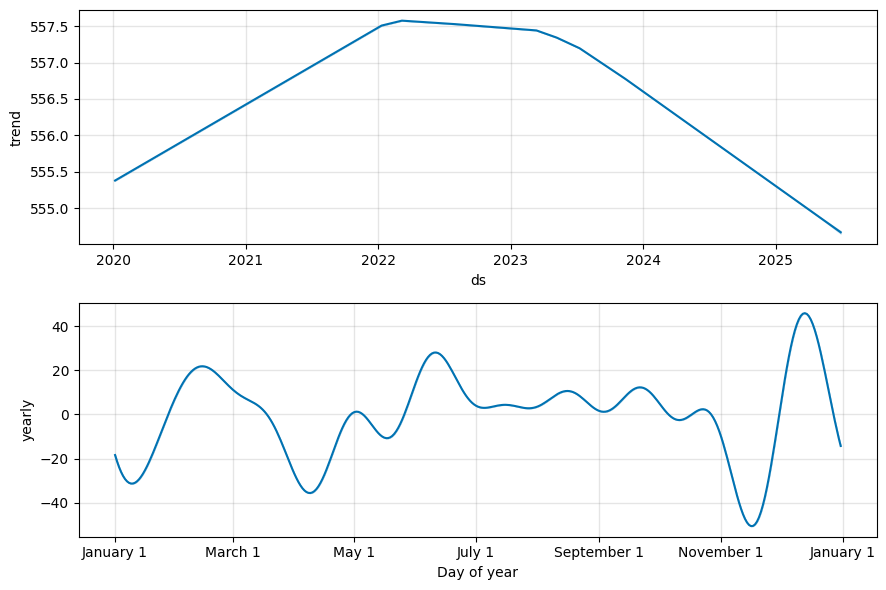

In [ ]:
fig2 = modelo.plot_components(previsoes)


In [ ]:
df_prophet.shape


(274, 2)

In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:68]

df_treino['y'] = df_prophet['y'][:68]

In [ ]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][68:]
df_teste['y'] = df_prophet['y'][68:]

In [ ]:
np.random.seed(42)
modelo = Prophet()
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=180, freq='D')
previsoes = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftre5zqy/cjbllkuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftre5zqy/r07t236t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33070', 'data', 'file=/tmp/tmpftre5zqy/cjbllkuu.json', 'init=/tmp/tmpftre5zqy/r07t236t.json', 'output', 'file=/tmp/tmpftre5zqy/prophet_modelalvdyvxa/prophet_model-20251009185240.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:52:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:40 - cmdstanpy - INFO - Chai

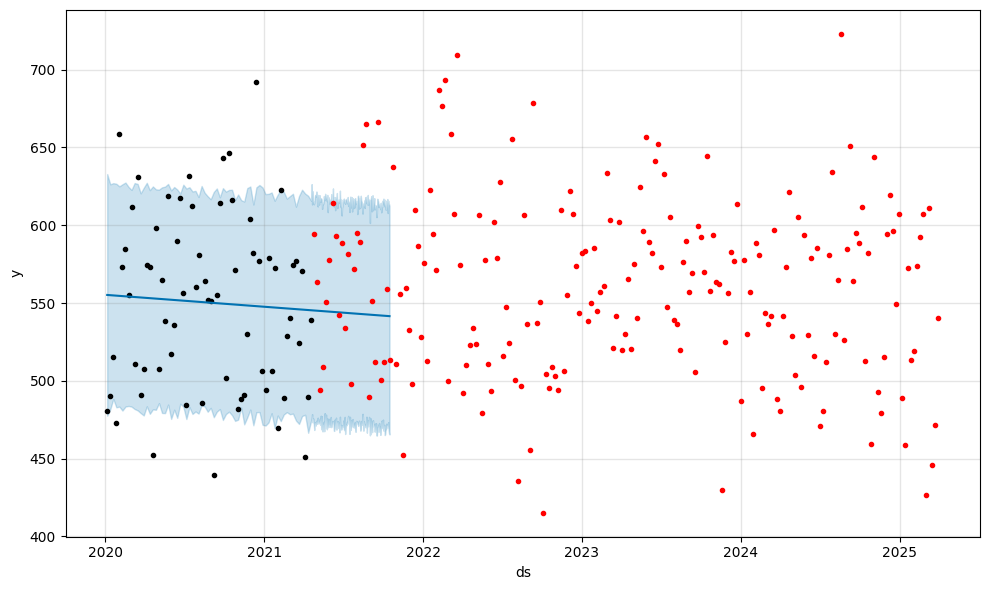

In [ ]:
fig1 = modelo.plot(previsoes)
plt.plot(df_teste['ds'],df_teste['y'], '.r' )

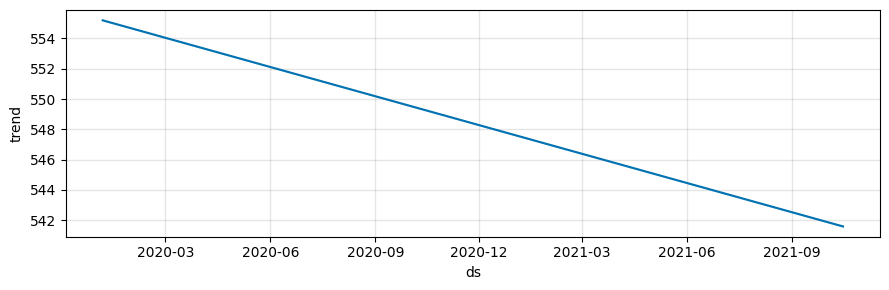

In [ ]:
fig2 = modelo.plot_components(previsoes)


In [ ]:
df_previsao = previsoes[['ds', 'yhat' ]]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao


,ds,yhat,y
0,2021-04-26,545.213573,594.31
1,2021-05-03,545.066734,563.36
2,2021-05-10,544.919895,493.98
3,2021-05-17,544.773055,508.91
4,2021-05-24,544.626216,550.44
5,2021-05-31,544.479376,577.85
6,2021-06-07,544.332537,614.36
7,2021-06-14,544.185698,592.92
8,2021-06-21,544.038858,542.04
9,2021-06-28,543.892019,588.79


In [ ]:
from sklearn.metrics import mean_squared_error


Utilizando a métrica Raiz Quadrada do Erro Quadrático Médio


Está medida demonstra que o modelo está errando 54 unicdades da váriavel preditora, que neste caso é o preço dos produtos

In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 54.85763385175884


In [ ]:
df_prophet


,ds,y
0,2020-01-06,480.48
1,2020-01-13,490.16
2,2020-01-20,515.22
3,2020-01-27,472.66
4,2020-02-03,658.74
...,...,...
269,2025-03-03,426.46
270,2025-03-10,611.21
271,2025-03-17,446.12
272,2025-03-24,471.51
